In [4]:
import pandas as pd

from scipy.spatial import distance

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [2]:
df = pd.read_json('../data/preds.json', lines=True)

In [10]:
df['wc'] = df.tokens.apply(len)

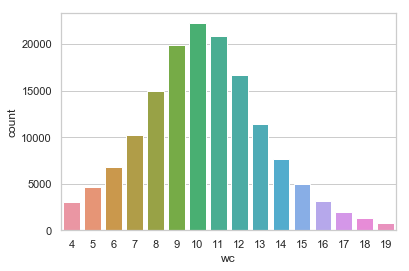

In [14]:
sns.countplot(df.wc[df.wc<20])

In [23]:
pdf = df[df.wc==10].copy()
pdf['d'] = pdf.apply(lambda r: distance.cosine(r.attn_dist, r.attn_ctx_dist), 1)

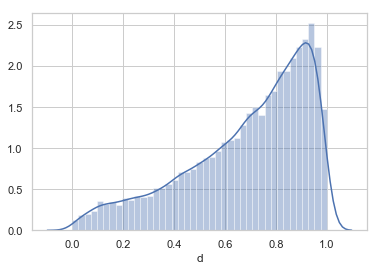

In [24]:
sns.distplot(pdf.d)

In [32]:
for r in pdf[pdf.d > 0.95].head(10).itertuples():
    print(r.label)
    print(r.tokens)
    print(r.preds)
    print(list(zip(r.tokens, r.attn_dist, r.attn_ctx_dist)))

nytimes.com
['seven', 'leading', 'architects', 'defend', 'the', 'world', 's', 'most', 'hated', 'buildings']
{'breitbart.com': 0.6174532771, 'nytimes.com': 0.3825466037}
[('seven', 0.0001101048, 0.0358201265), ('leading', 0.0037972205, 0.023459635700000002), ('architects', 0.0219868589, 0.0066099861000000005), ('defend', 0.7293157578, 0.0207531583), ('the', 0.2199683785, 0.015778731600000002), ('world', 0.007474255700000001, 0.0050351894), ('s', 0.0015359911, 0.002307036), ('most', 0.005331018900000001, 0.004428459300000001), ('hated', 0.0099949129, 0.0329349414), ('buildings', 0.0004853913, 0.8528727293)]
nytimes.com
['minneapolis', 'police', 'video', 'shows', 'moments', 'before', 'thurman', 'blevins', 'was', 'shot']
{'breitbart.com': 0.6417707801, 'nytimes.com': 0.3582291603}
[('minneapolis', 0.0003835873, 0.0008514801), ('police', 0.0346859284, 0.0015226364), ('video', 0.7109795809, 0.0009852522000000001), ('shows', 0.0719966888, 0.0570172332), ('moments', 0.0062420364, 0.1045158207)